In [201]:
from dask_jobqueue import SLURMCluster
import matplotlib.pyplot as plt 
import glob
import os
import xarray as xr 
import pandas as pd
import numpy as np


cluster = SLURMCluster(
    job_name="Climt1",          # --job-name
    cores=46,                   # 24 cores per node
    processes=8,                # One process per task
    memory="120GB",             # --mem
    walltime="01:15:00",        # --time
    queue="med",                # --partition
    log_directory=".",          # Logs will be saved to the current directory
)

from dask.distributed import Client


cluster.scale(jobs=10)
client = Client(cluster)

/home1/nalex2023/.conda/envs/nma/lib/python3.13/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46429 instead
  warnings.warn(


In [202]:
client

Connection method: Cluster object,Cluster type: dask_jobqueue.SLURMCluster
Dashboard: http://10.42.239.61:46429/status,
Dashboard: http://10.42.239.61:46429/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://10.42.239.61:34975,Workers: 0
Dashboard: http://10.42.239.61:46429/status,Total threads: 0
Started: Just now,Total memory: 0 B


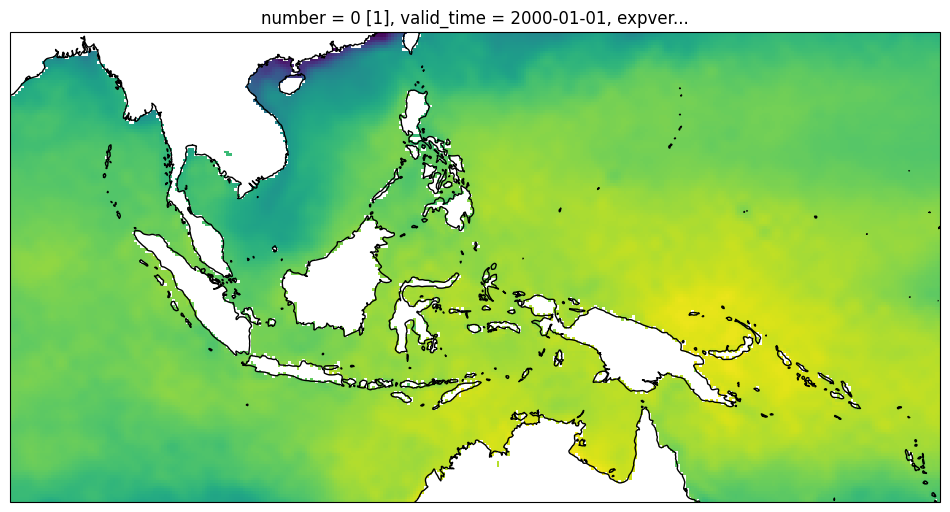

In [208]:
in_fol = '/home1/nalex2023/Datasets/ERA5_single_maritime/sst_and_t2m_2000_2014/'




dset = xr.open_mfdataset(in_fol+'*.nc')



import cartopy.crs as crs

fig,ax = plt.subplots(1,1,figsize=(12,8),subplot_kw={'projection': crs.PlateCarree()})
dset.isel(valid_time=0).sst.plot(transform=crs.PlateCarree(),ax=ax,add_colorbar=False)

ax.coastlines()